<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_56/blob/main/Entrega_1_(16_11)_%3E_Limpieza%2C_an%C3%A1lisis%2C_visualizaci%C3%B3n_y_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 706 kB/s 
     |████████████████████████████████| 1.0 MB 40.0 MB/s 
     |████████████████████████████████| 1.7 MB 43.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 38.8 MB/s 
     |████████████████████████████████| 6.3 MB 43.4 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=f9a50dde6cbccbac4b8e447c8033c5d0e525856dd1d1edecb1cd67fc0682e26b
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=f75289f1db271c316c377f5b17c25ee04922b239425fc58facb113a208530e98
  Stored in directory: /root/.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_validate, learning_curve, validation_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn import metrics
from math import isnan
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, QuantileTransformer
from sklearn.preprocessing import power_transform, quantile_transform
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
import seaborn as sns 
import warnings
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In [21]:
#url1 = '/content/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv'
url1 = '/content/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
datos = pd.read_csv(url1,encoding = "ISO-8859-1")
datos.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


Se comprueba que no hay valores nulos en el dataset

In [22]:
datos.shape

(1068, 57)

In [23]:
datos.isna().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

In [24]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [31]:
datos['CALIDAD_MN'].describe()

datos['CALIDAD_MN'].value_counts()

Potable - Excelente                                  982
Puede afectar la salud                                50
Sin efectos en la salud - Puede dar color al agua     36
Name: CALIDAD_MN, dtype: int64

In [ ]:
datos.shape

(1068, 58)

In [32]:
#Obtenemos los nombres de las columnas 

#list(datos.columns)

In [ ]:
datos["SITIO"].value_counts()
datos["SITIO"].value_counts()
datos["SITIO"].value_counts()
datos["SITIO"].value_counts()
datos["SITIO"].value_counts()


ANTES DE LA CONFLUENCIA CON EL RIO ATOYAC    3
PRESA DERIVADORA MORELOS                     2
RIO GUANAJUATO                               2
PRESA BENITO JUAREZ CORTINA                  2
EL PUENTE                                    2
                                            ..
RIO TECOLUTLA 1                              1
PRESA LA SOLEDAD                             1
RIO CAZONES 1                                1
LAZARO CARDENAS                              1
RIO BRAVO 8 (PASO DE LOS INDIOS)             1
Name: SITIO, Length: 3481, dtype: int64

In [25]:
# imputacion por moda - Categóricos
datos_cat = ['CALIDAD_ALC', 'CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR','CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS',
              'CALIDAD_CD','CALIDAD_CR', 'CALIDAD_HG','CALIDAD_PB', 'CALIDAD_MN', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES'   ]

# imputacion por moda - Continuos
datos_cnt = ['LONGITUD', 'LATITUD' ,'ALC_mg/L','CONDUCT_mS/cm' ,'SDT_M_mg/L','FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L']

# imputacion por moda - Binarios
datos_bin = ['CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF','CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR'
               'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN' , 'CUMPLE_CON_FE' ]

In [ ]:
for v in datos.columns:  # datos.columns:
    print(v)
    print(datos[v].unique())
    print("-----")

CLAVE
['DLAGU6' 'DLAGU6516' 'DLAGU7' ... 'OCRBR5105M2' 'OCRBR5106M1'
 'OCRBR5109M1']
-----
SITIO
['POZO SAN GIL' 'POZO R013 CAÑADA HONDA' 'POZO COSIO' ...
 'HACIENDA MEXIQUITO POZO 01' 'COMUNIDAD LOS POCITOS'
 'COMUNIDAD LA REFORMA']
-----
ORGANISMO_DE_CUENCA
['LERMA SANTIAGO PACIFICO' 'PENINSULA DE BAJA CALIFORNIA'
 'PENINSULA DE YUCATAN' 'RIO BRAVO' 'CUENCAS CENTRALES DEL NORTE'
 'PACIFICO NORTE' 'BALSAS' 'PACIFICO SUR' 'GOLFO NORTE'
 'AGUAS DEL VALLE DE MEXICO' 'GOLFO CENTRO' 'FRONTERA SUR' 'NOROESTE']
-----
ESTADO
['AGUASCALIENTES' 'BAJA CALIFORNIA SUR' 'CAMPECHE' 'CHIHUAHUA'
 'COAHUILA DE ZARAGOZA' 'COLIMA' 'DURANGO' 'MEXICO' 'GUANAJUATO'
 'GUERRERO' 'HIDALGO' 'MICHOACAN DE OCAMPO' 'NAYARIT' 'PUEBLA'
 'QUERETARO ARTEAGA' 'QUINTANA ROO' 'SAN LUIS POTOSI' 'TABASCO' 'TLAXCALA'
 'ZACATECAS' 'DISTRITO FEDERAL' 'MORELOS' 'OAXACA' 'CHIAPAS'
 'VERACRUZ DE IGNACIO DE LA LLAVE' 'TAMAULIPAS' 'JALISCO' 'SONORA'
 'BAJA CALIFORNIA' 'SINALOA' 'YUCATAN' 'NUEVO LEON']
-----
MUNICIPIO
['ASIENTOS' '

In [ ]:
CALIDAD_ALC1 = ['Alta' ,'Media']

CALIDAD_CONDUC1 = ['Permisible para riego' ,'Buena para riego' ,'Dudosa para riego',
                        ]
CALIDAD_SDT_ra1 = ['Cultivos sensibles' ,'Excelente para riego',
                    'Cultivos con manejo especial' ]
CALIDAD_SDT_salin1 = ['Potable - Dulce', 'Ligeramente salobres', ]

CALIDAD_FLUO1 = ['Potable - Optima' ,'Alta' ,'Baja' ,'Media']

CALIDAD_DUR1 = ['Potable - Dura' ,'Potable - Suave', 'Potable - Moderadamente suave' ]

CALIDAD_COLI_FEC1 = ['Potable - Excelente' ,'Aceptable' ,'Buena calidad']

CALIDAD_N_NO31 = ['Potable - Excelente' ,'Potable - Buena calidad' ,'No apta como FAAP' ]

CALIDAD_AS1 = ['Apta como FAAP', 'No apta como FAAP', 'Potable - Excelente']

CALIDAD_MN1 = ['Potable - Excelente' , 'Sin efectos en la salud - Puede dar color al agua']

CALIDAD_FE1 = ['Potable - Excelente' ,'Sin efectos en la salud - Puede dar color al agua']

In [58]:
#Filtrafo de datos 
newdf_pot = datos.loc[(datos.CALIDAD_MN == 'Potable - Excelente')]
newdf_sin = datos.loc[(datos.CALIDAD_MN == 'Sin efectos en la salud - Puede dar color al agua')]
newdf_pu = datos.loc[(datos.CALIDAD_MN == 'Puede afectar la salud')]



In [27]:
#Tamano de Potable/ excelente 
newdf_pot.shape

(982, 57)

In [28]:
#Tamano Sin efectos en la salud - Puede dar color al agua' 
newdf_sin.shape

(36, 57)

In [29]:
#Tamano 'Puede afectar la salud'' 
newdf_pu.shape

(50, 57)

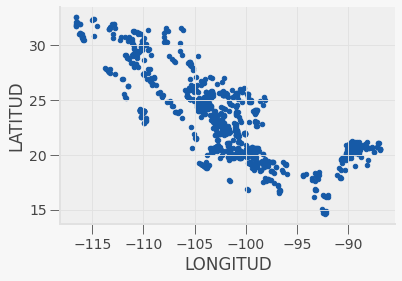

In [114]:
latlong_pot=newdf_pot[["LONGITUD","LATITUD"]]
latlong_pot.plot.scatter( "LONGITUD","LATITUD")


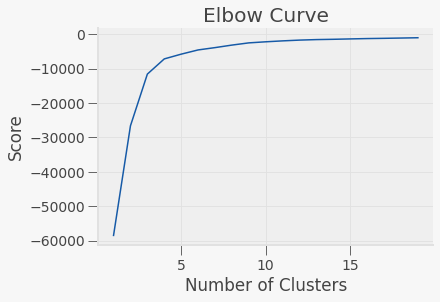

In [74]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(latlong_pot).score(latlong_pot) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [116]:
kmeans = KMeans(n_clusters=5).fit(latlong_pot)
centroids_pot = kmeans.cluster_centers_
print(centroids_pot)

[[-100.17233171   20.26030019]
 [-103.24675467   24.73698274]
 [ -89.96743794   19.71226617]
 [-112.12196228   30.20953712]
 [-109.27409095   25.34746037]]


Numer de agrupaciones para agua potable = 5

In [109]:
latlong_pot["Coordinates"] = list(zip(latlong_pot.LONGITUD, latlong_pot.LATITUD))
latlong_pot["Coordinates"] = latlong_pot["Coordinates"].apply(Point)
gdf_pot = gpd.GeoDataFrame(latlong_pot, geometry="Coordinates")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


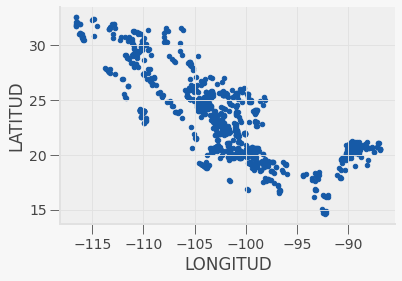

In [118]:
latlong_sin=newdf_sin[["LONGITUD","LATITUD"]]
latlong_pot.plot.scatter( "LONGITUD","LATITUD")


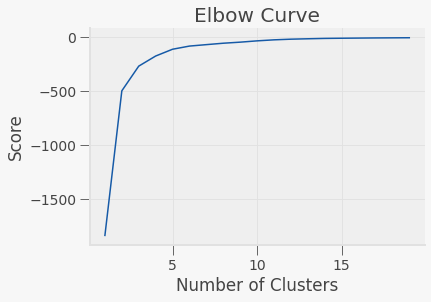

In [79]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(latlong_sin).score(latlong_sin) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Agrupaciones de =  3 
para grupo Sin efectos en la salud - Puede dar color al agua

In [119]:
kmeans = KMeans(n_clusters=3).fit(latlong_sin)
centroids_sin = kmeans.cluster_centers_
print(centroids_sin)

[[-104.68104      21.33039636]
 [-114.1748152    32.1619394 ]
 [ -99.0686151    19.9456238 ]]


In [120]:
latlong_sin["Coordinates"] = list(zip(latlong_sin.LONGITUD, latlong_sin.LATITUD))
latlong_sin["Coordinates"] = latlong_sin["Coordinates"].apply(Point)
gdf_sin = gpd.GeoDataFrame(latlong_sin, geometry="Coordinates")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


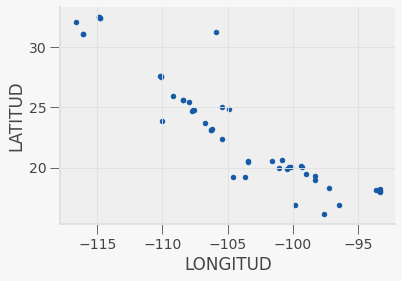

In [139]:
latlong_pu=newdf_pu[["LONGITUD","LATITUD"]]
latlong_pu.plot.scatter( "LONGITUD","LATITUD")

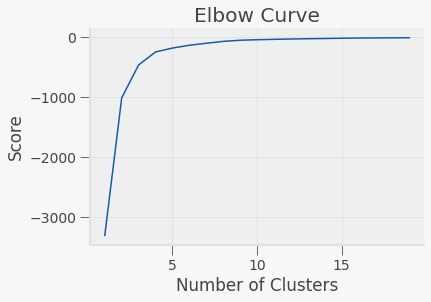

In [82]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(latlong_pu).score(latlong_pu) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Agrupaciones = 5 
para el grupo 'Puede afectar la salud' 

In [140]:
kmeans = KMeans(n_clusters=5).fit(latlong_pu)
centroids_pu = kmeans.cluster_centers_
print(centroids_pu)

[[-106.418884     23.971429  ]
 [ -94.7724535    17.73327775]
 [-108.93516689   26.70074911]
 [-100.83072025   19.70332119]
 [-115.46716271   32.000323  ]]


In [123]:
latlong_pu["Coordinates"] = list(zip(latlong_pu.LONGITUD, latlong_pu.LATITUD))
latlong_pu["Coordinates"] = latlong_pu["Coordinates"].apply(Point)
gdf_pu = gpd.GeoDataFrame(latlong_pu, geometry="Coordinates")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


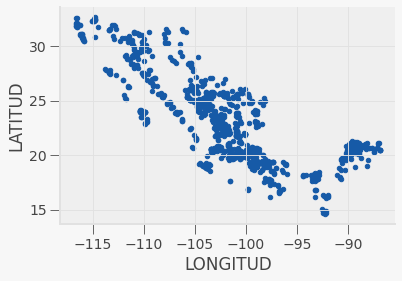

In [87]:
latlong=datos[["LONGITUD","LATITUD"]]
latlong.plot.scatter( "LONGITUD","LATITUD")

In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [39]:
datos["Coordinates"] = list(zip(datos.LONGITUD, datos.LATITUD))
datos["Coordinates"] = datos["Coordinates"].apply(Point)
datos.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Coordinates
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.0221 22.20887)
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.20075 21.99958)
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,POINT (-102.28801 22.36685)
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.29449 22.18435)
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,NO,SI,SI,SI,SI,SI,SI,SI,POINT (-110.2448 23.45138)


In [40]:
gdf = gpd.GeoDataFrame(datos, geometry="Coordinates")
gdf.head()
gdf.shape

(1068, 58)

In [41]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


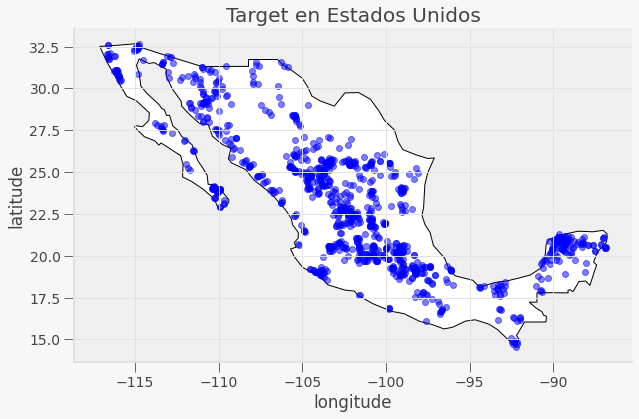

In [42]:

fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')


gdf.plot(ax=gax, color='blue', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

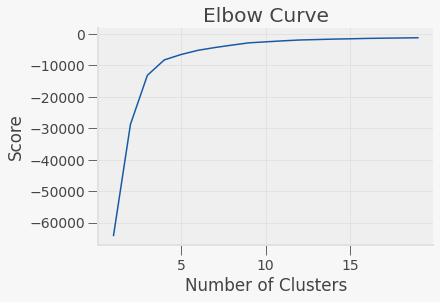

In [43]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(latlong).score(latlong) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [103]:
kmeans = KMeans(n_clusters=5).fit(latlong_pot)
centroids = kmeans.cluster_centers_
print(centroids)

[[-112.25418009   30.13391374]
 [-100.09153496   19.88225026]
 [-102.55889739   24.22592542]
 [ -89.96743794   19.71226617]
 [-107.76455864   25.8263907 ]]


In [104]:

cent = pd.DataFrame(centroids, columns=["longitude","latitude"])
cent.head(1)
cent.shape
cent.head(5)

,longitude,latitude
0,-112.254180,30.133914
1,-100.091535,19.882250
2,-102.558897,24.225925
3,-89.967438,19.712266
4,-107.764559,25.826391


In [141]:
cent1 = pd.DataFrame(centroids_pot, columns=["longitude","latitude"])
cent2 = pd.DataFrame(centroids_sin, columns=["longitude","latitude"])
cent3 = pd.DataFrame(centroids_pu, columns=["longitude","latitude"])

In [142]:
cent1["Coordinates"] = list(zip(cent1.longitude, cent1.latitude))
cent1["Coordinates"] = cent1["Coordinates"].apply(Point)

cent2["Coordinates"] = list(zip(cent2.longitude, cent2.latitude))
cent2["Coordinates"] = cent2["Coordinates"].apply(Point)

cent3["Coordinates"] = list(zip(cent3.longitude, cent3.latitude))
cent3["Coordinates"] = cent3["Coordinates"].apply(Point)

In [143]:
gdf1 = gpd.GeoDataFrame(cent1, geometry="Coordinates")
gdf2 = gpd.GeoDataFrame(cent2, geometry="Coordinates")
gdf3 = gpd.GeoDataFrame(cent3, geometry="Coordinates")

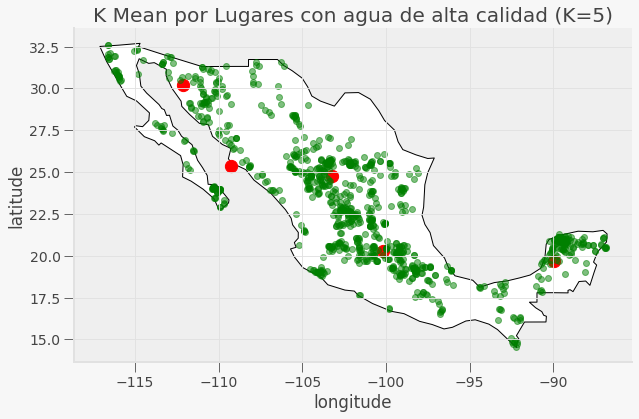

In [153]:
from matplotlib.lines import MarkerStyle

fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')


gdf1.plot(ax=gax, color='red', alpha = 1,markersize=150)

gdf_pot.plot(ax=gax, color='green', alpha = 0.5)


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('K Mean por Lugares con agua de alta calidad (K=5)')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

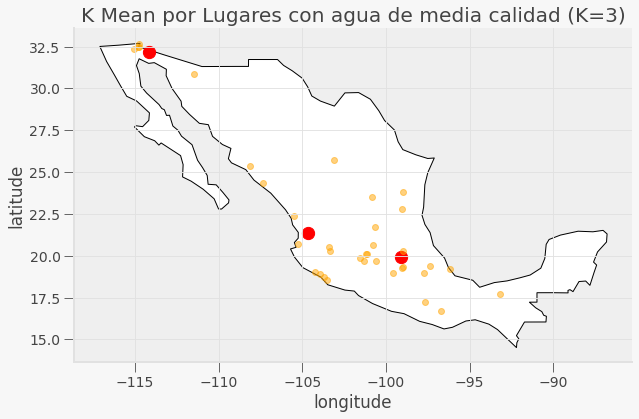

In [154]:
from matplotlib.lines import MarkerStyle

fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')


gdf2.plot(ax=gax, color='red', alpha = 1,markersize=150)

gdf_sin.plot(ax=gax, color='orange', alpha = 0.5)


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('K Mean por Lugares con agua de media calidad (K=3)')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

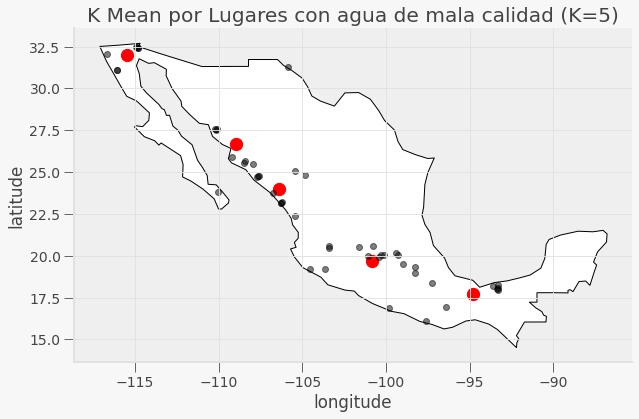

In [155]:
from matplotlib.lines import MarkerStyle

fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')


gdf3.plot(ax=gax, color='red', alpha = 1,markersize=150)

gdf_pu.plot(ax=gax, color='black', alpha = 0.5)


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('K Mean por Lugares con agua de mala calidad (K=5)')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

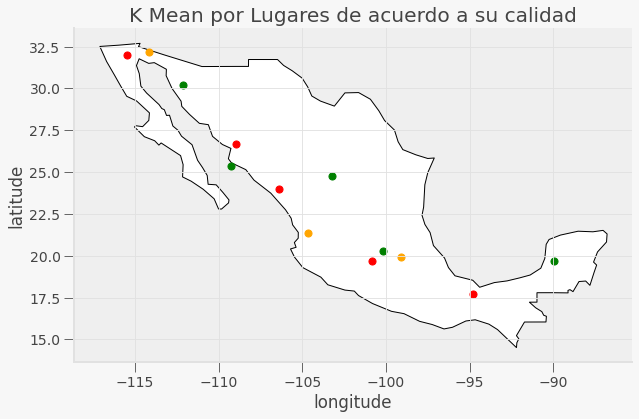

In [156]:
from matplotlib.lines import MarkerStyle

fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')


gdf1.plot(ax=gax, color='green', alpha = 1,markersize=50)
gdf2.plot(ax=gax, color='orange', alpha = 1,markersize=50)
gdf3.plot(ax=gax, color='red', alpha = 1,markersize=50)


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('K Mean por Lugares de acuerdo a su calidad')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()